import required dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

store the data to different collumns

In [2]:
training_data = pd.read_csv('training_data.csv')

x_name = ['Combined1']
y_name = 'rb_win_rate'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

plot training data on a graph

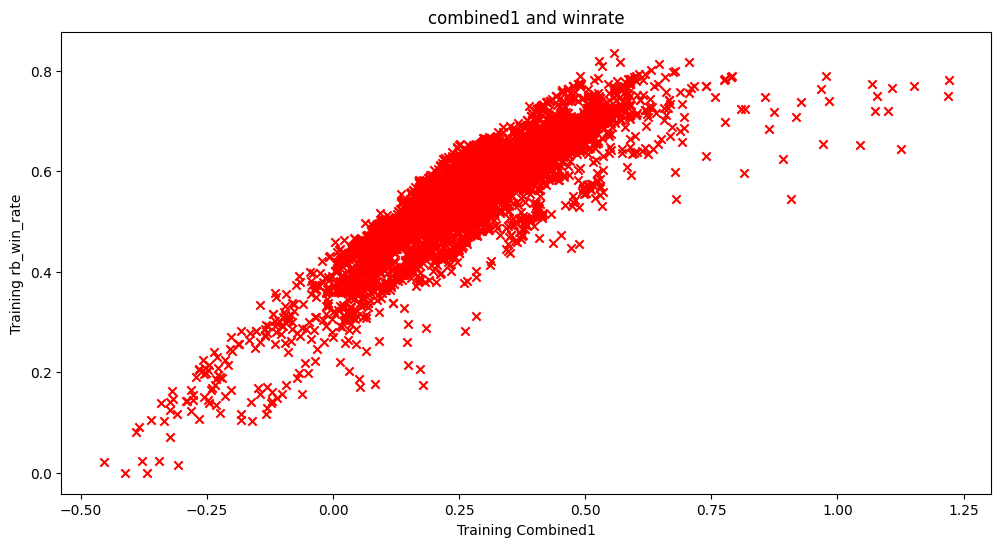

In [3]:
plt.figure(figsize=(12, 6))
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("combined1 and winrate")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,6))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("winrate based on date scaled")
plt.show()

In [4]:
training_data.describe()

,rb_lower_br,rb_battles_sum,rb_battles_mean,rb_win_rate,rb_air_frags_per_battle,rb_air_frags_per_death,rb_ground_frags_per_battle,rb_ground_frags_per_death,avgwr,Combined1
count,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6795.000000,6822.000000
mean,6.650191,8866.113163,938.466664,0.564099,0.081195,0.082176,0.138848,0.362356,0.558553,0.277236
std,3.229481,10403.636627,1179.170230,0.101629,0.077551,0.076953,0.062672,0.131119,0.109755,0.150953
min,1.000000,42.000000,5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154824,-0.454396
25%,4.000000,1900.000000,249.856682,0.509776,0.016592,0.016073,0.101559,0.270109,0.502903,0.187532
50%,6.700000,4842.000000,591.984853,0.579607,0.070206,0.067707,0.127909,0.345495,0.577482,0.279068
75%,9.300000,11594.250000,1109.099307,0.627769,0.118932,0.126791,0.166198,0.443811,0.625308,0.366358
max,12.000000,62213.000000,11051.000000,0.836001,0.733911,0.568807,0.976373,0.997693,0.788136,1.221316


save an instance of polynomal features (degree is x)

In [5]:
# Combine x and y into a DataFrame for consistent filtering
data = pd.DataFrame({'x': x.flatten(), 'y': y})

# Drop rows with NaN values in either x or y
data = data.dropna()

# Extract filtered x and y
x = data['x'].values.reshape(-1, 1)
y = data['y'].values

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)

# Create and fit the model
my_model = LinearRegression()
my_model.fit(poly_features, y)

plt.show()

plot the features, targets and model

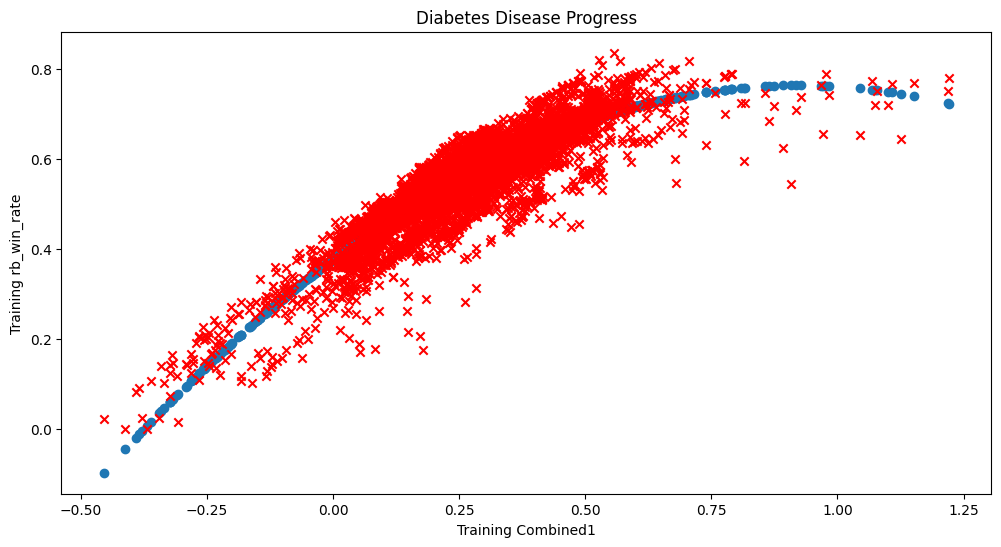

In [6]:
plt.figure(figsize=(12, 6))
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,6),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

save model for evaluation

In [7]:
pickle.dump(my_model, open('../4.Model Testing and Validation/my_saved_model_v1.sav', 'wb'))
pickle.dump(poly, open('../4.Model Testing and Validation/poly_features.sav', 'wb'))
